# Predict Podcast Listening Time

# Requirements

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [5]:
train = pd.read_csv("train.csv")

In [6]:
test = pd.read_csv("test.csv")

In [8]:
sample_submission = pd.read_csv("sample_submission.csv")

In [12]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [14]:
test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


# EDA (Exploratory Data Analysis)

In [19]:
train.shape

(750000, 12)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [23]:
train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [25]:
train.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [27]:
missing = train.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(train) * 100).sort_values(ascending=False)
missing_df = pd.concat([missing, missing_percent], axis=1)
missing_df.columns = ['Missing Values', 'Percentage']
print(missing_df)

                             Missing Values  Percentage
Guest_Popularity_percentage          146030   19.470667
Episode_Length_minutes                87093   11.612400
Number_of_Ads                             1    0.000133
id                                        0    0.000000
Podcast_Name                              0    0.000000
Episode_Title                             0    0.000000
Genre                                     0    0.000000
Host_Popularity_percentage                0    0.000000
Publication_Day                           0    0.000000
Publication_Time                          0    0.000000
Episode_Sentiment                         0    0.000000
Listening_Time_minutes                    0    0.000000


# Handling Missing Value 

In [34]:
train['Guest_Popularity_percentage'] = train['Guest_Popularity_percentage'].fillna(train['Guest_Popularity_percentage'].median())
train['Episode_Length_minutes'] = train['Episode_Length_minutes'].fillna(train['Episode_Length_minutes'].median())
train['Number_of_Ads'] = train['Number_of_Ads'].fillna(train['Number_of_Ads'].median())


In [38]:
train.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

# Categorical Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])

# Data Visualization

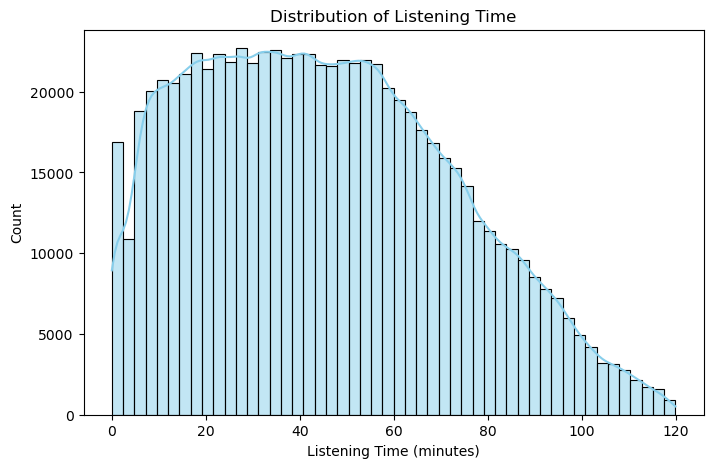

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(train['Listening_Time_minutes'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Listening Time")
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Count")
plt.show()

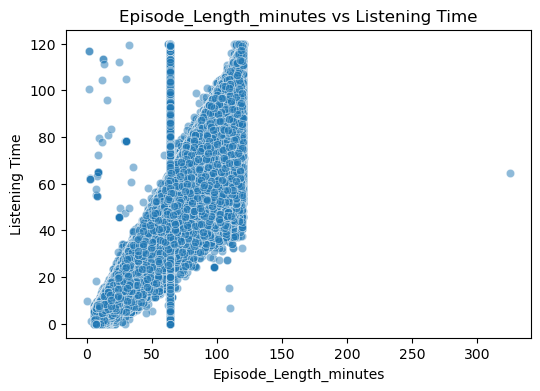

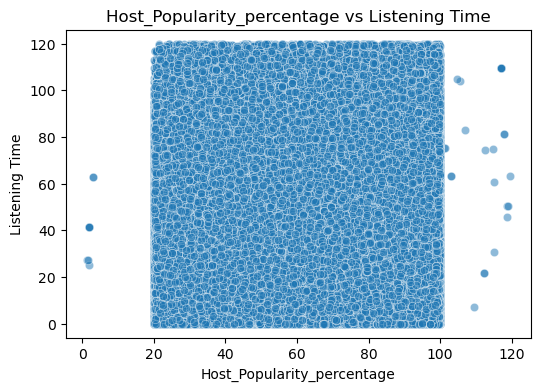

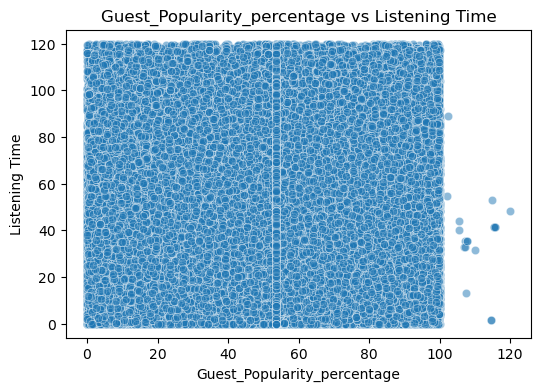

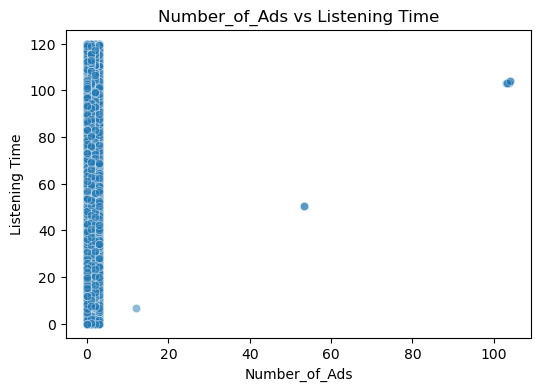

In [44]:
numerical_features = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[col], y=train['Listening_Time_minutes'], alpha=0.5)
    plt.title(f"{col} vs Listening Time")
    plt.xlabel(col)
    plt.ylabel("Listening Time")
    plt.show()


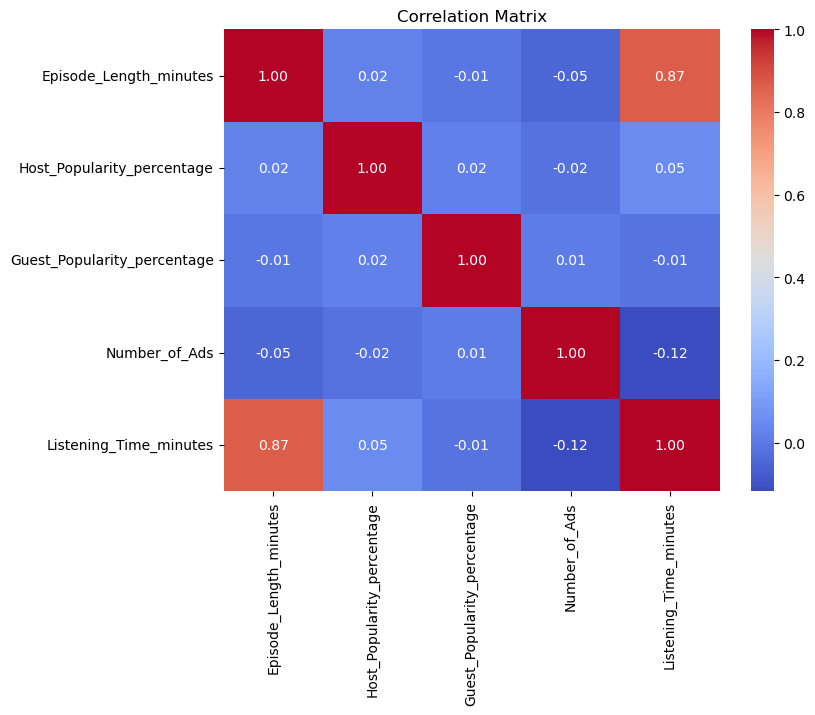

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(train[numerical_features + ['Listening_Time_minutes']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


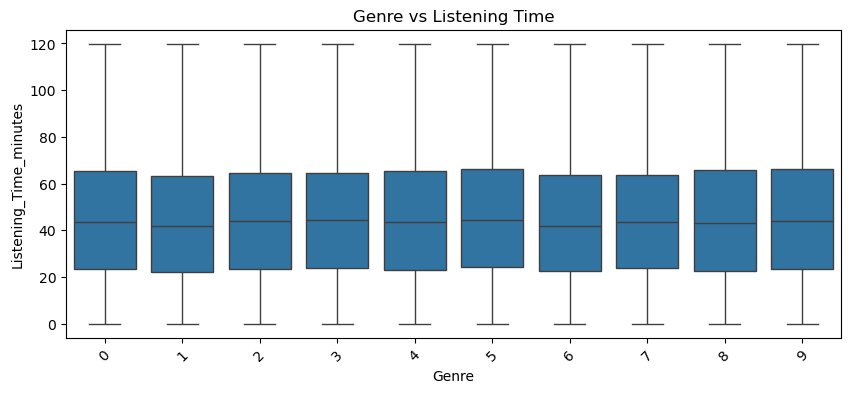

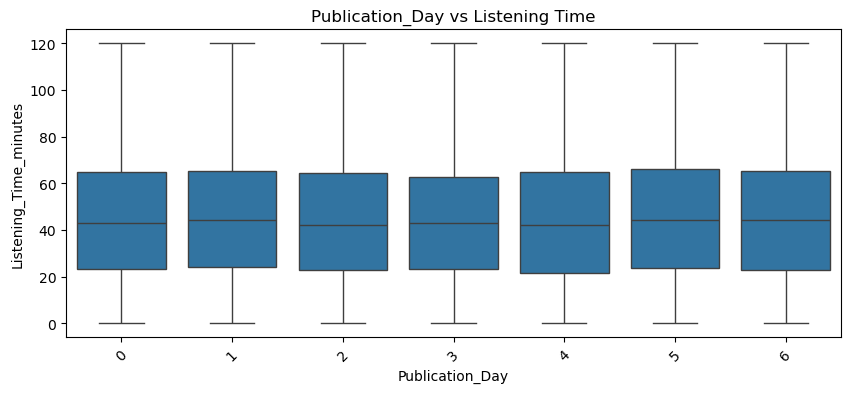

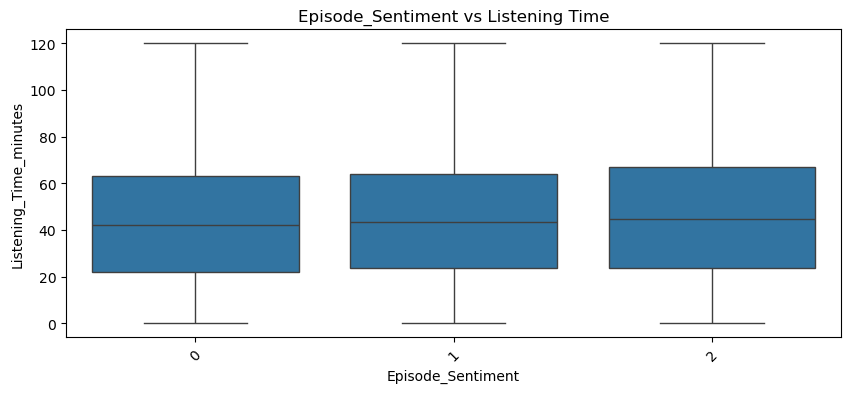

In [46]:
categorical_features = ['Genre', 'Publication_Day', 'Episode_Sentiment']

for col in categorical_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=train[col], y=train['Listening_Time_minutes'])
    plt.title(f"{col} vs Listening Time")
    plt.xticks(rotation=45)
    plt.show()


# Modeling

In [64]:
X_train = train.drop(columns=['Listening_Time_minutes', 'id'])
y_train = train['Listening_Time_minutes']
X_test = test.drop(columns=['id'])

In [66]:
categorical_features = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    encoders[col] = le

In [68]:
for col in categorical_features:
    le = encoders[col]
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

In [70]:
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [72]:
preds = rf_model.predict(X_test)

In [74]:
sample_submission['Listening_Time_minutes'] = preds
sample_submission.to_csv("submission.csv", index=False)
print("submission.csv oluşturuldu!")

submission.csv oluşturuldu!
